In [39]:
import pandas as pd

In [40]:
customer_info = pd.read_csv("C:/Users/aprataso/Downloads/final_data/treated/hh_treated.csv")
basket = pd.read_csv('C:/Users/aprataso/Downloads/final_data/treated/basket_treated.csv') # basket
campaign = pd.read_csv('C:/Users/aprataso/Downloads/final_data/treated/campaigns_treated.csv') # campaign
coupon = pd.read_csv('C:/Users/aprataso/Downloads/final_data/treated/coupon_treated.csv') # basket
prod = pd.read_csv('C:/Users/aprataso/Downloads/final_data/treated/prod_treated.csv') # prod
# prod

In [41]:
customer_info.head(5)

,age_desc,marital_status_code,income_desc,homeowner_desc,hh_comp_desc,household_size_desc,kid_category_desc,household_key,marital_status,age_group,adult_category_size,has_kids,min_age,max_age,avg_age,income_,avg_income,n_kids,n_household
0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1,married,senior,2.0,NaN,65,65,65.0,"[35, 49]",42000,NaN,2
1,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7,married,middle-aged,2.0,NaN,45,54,49.5,"[50, 74]",62000,NaN,2
2,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,8,unknown,adult,2.0,True,25,34,29.5,"[25, 34]",29500,1.0,3
3,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,13,unknown,adult,2.0,True,25,34,29.5,"[75, 99]",87000,2.0,4
4,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,16,single,middle-aged,1.0,False,45,54,49.5,"[50, 74]",62000,NaN,1


In [42]:
customer_info.describe().T

,count,mean,std,min,25%,50%,75%,max
household_key,801.0,1235.176030,736.804647,1.0,596.0,1218.0,1914.0,2499.0
adult_category_size,728.0,1.607143,0.488721,1.0,1.0,2.0,2.0,2.0
min_age,801.0,40.073658,12.377230,19.0,35.0,45.0,45.0,65.0
max_age,801.0,48.034956,11.385903,24.0,44.0,54.0,54.0,65.0
avg_age,801.0,44.054307,11.816719,21.5,39.5,49.5,49.5,65.0
avg_income,801.0,64810.237203,46952.864077,15000.0,29500.0,62000.0,87000.0,250000.0
n_kids,243.0,1.814815,0.849566,1.0,1.0,2.0,3.0,3.0
n_household,801.0,2.197253,1.193123,1.0,1.0,2.0,3.0,5.0


In [43]:
customer_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age_desc             801 non-null    object 
 1   marital_status_code  801 non-null    object 
 2   income_desc          801 non-null    object 
 3   homeowner_desc       801 non-null    object 
 4   hh_comp_desc         801 non-null    object 
 5   household_size_desc  801 non-null    object 
 6   kid_category_desc    801 non-null    object 
 7   household_key        801 non-null    int64  
 8   marital_status       801 non-null    object 
 9   age_group            801 non-null    object 
 10  adult_category_size  728 non-null    float64
 11  has_kids             426 non-null    object 
 12  min_age              801 non-null    int64  
 13  max_age              801 non-null    int64  
 14  avg_age              801 non-null    float64
 15  income_              801 non-null    obj

## Missing Values

In [53]:
customer_info.isna().sum()

age_desc               0
marital_status_code    0
income_desc            0
homeowner_desc         0
hh_comp_desc           0
household_size_desc    0
kid_category_desc      0
household_key          0
marital_status         0
age_group              0
adult_category_size    0
has_kids               0
min_age                0
max_age                0
avg_age                0
income_                0
avg_income             0
n_kids                 0
n_household            0
dtype: int64

In [45]:
customer_info['has_kids'] = customer_info['has_kids'].fillna(False)

C:\Users\aprataso\AppData\Local\Temp\ipykernel_11144\708568793.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  customer_info['has_kids'] = customer_info['has_kids'].fillna(False)


In [46]:
customer_info['n_kids'] = customer_info['n_kids'].fillna(0)

In [51]:
customer_info[customer_info['adult_category_size'].isnull()]#.describe().T

,age_desc,marital_status_code,income_desc,homeowner_desc,hh_comp_desc,household_size_desc,kid_category_desc,household_key,marital_status,age_group,adult_category_size,has_kids,min_age,max_age,avg_age,income_,avg_income,n_kids,n_household


In [50]:
# fill missing values with n_household-n_kids
customer_info.loc[customer_info['adult_category_size'].isnull(), 'adult_category_size'] = (
    customer_info['n_household'] - customer_info['n_kids']
)

## Outliers

In [58]:
import matplotlib.pyplot as plt
import numpy as np

def graphs(data, graph, color='orange'):
    """
    Generate boxplots or histograms for numeric columns in the provided data.

    Args:
      data (pandas.DataFrame): The input data containing numeric columns.
      graph (str): The type of graph to generate. Options: 'boxplot' or 'histogram'.
      color (str): The color of the plot. Default is 'orange'.
    """

    for column in data.columns:
        # Check if the column is numeric
        if data[column].dtype == float or data[column].dtype == int:
            if graph == 'boxplot':
                plt.boxplot(data[column], vert=False, patch_artist=True, boxprops=dict(facecolor=color))
                plt.title(f'Boxplot of {column}')
                plt.yticks([])
                plt.show()

            elif graph == 'histogram':
                # Check if there are no infinite values in the column
                if not np.isinf(data[column]).any():
                    plt.hist(data[column], color=color)
                    plt.title(f'Histogram of {column}')
                    plt.show()

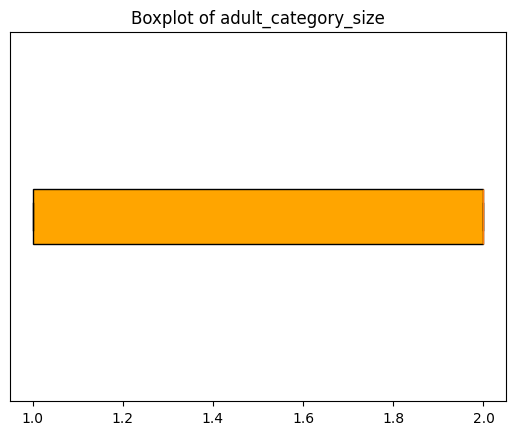

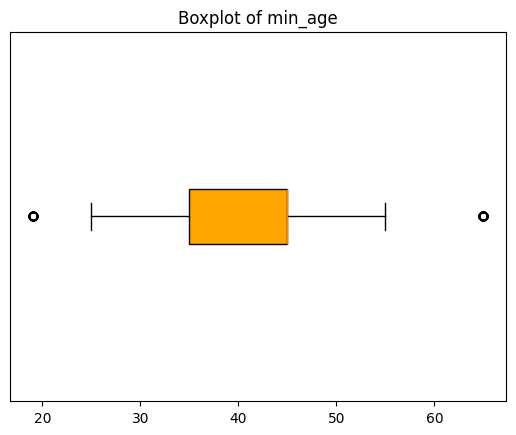

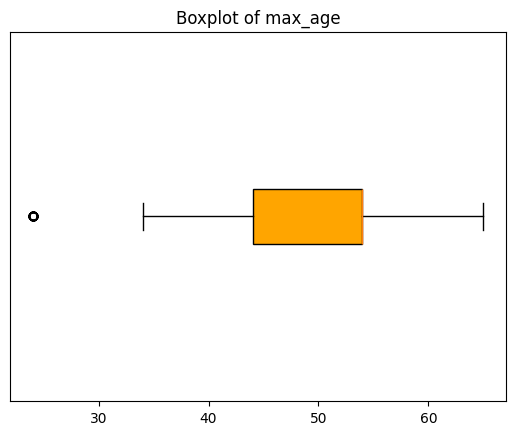

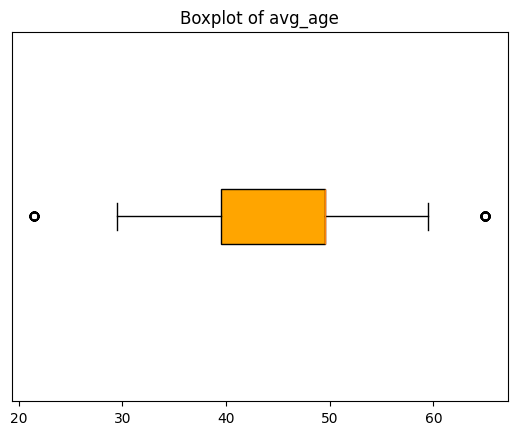

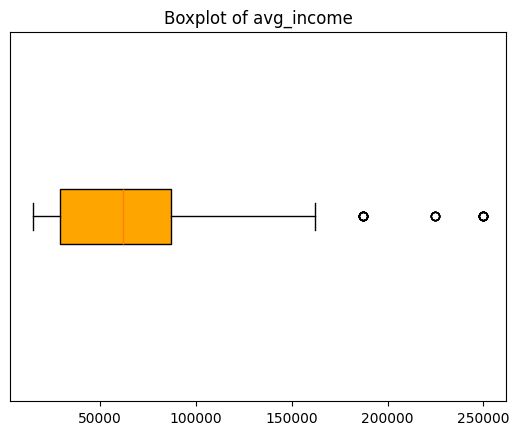

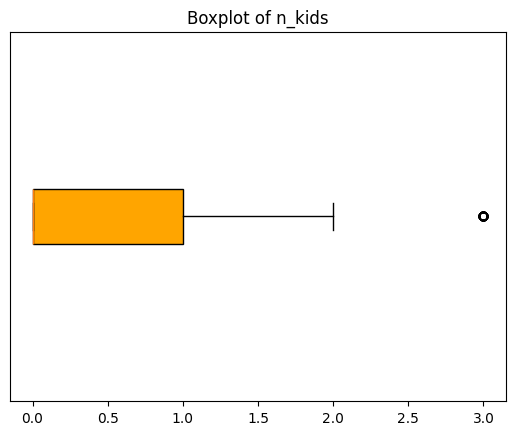

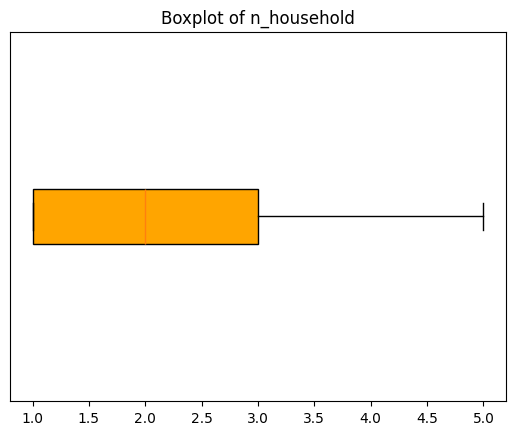

In [59]:
graphs(customer_info.loc[:, customer_info.columns != 'household_key'], graph = 'boxplot')

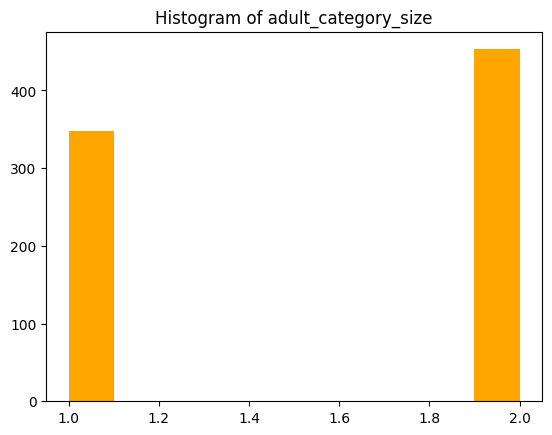

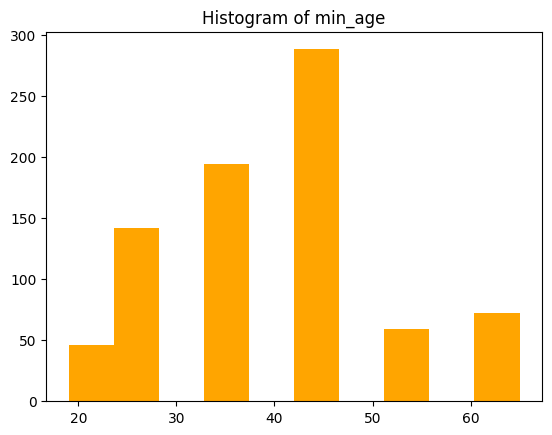

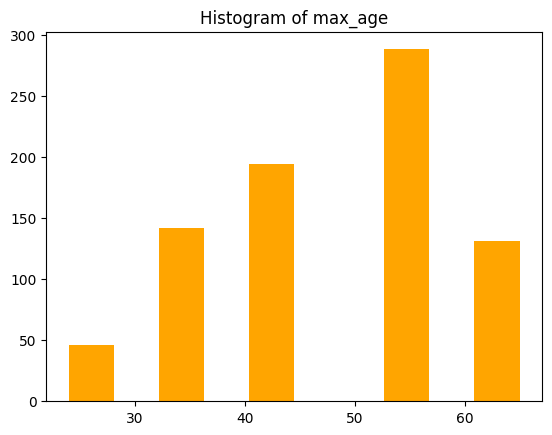

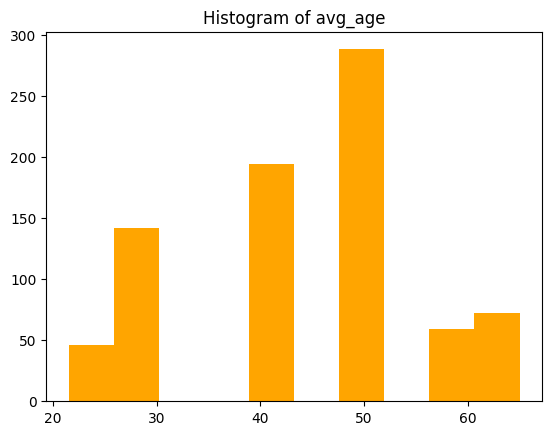

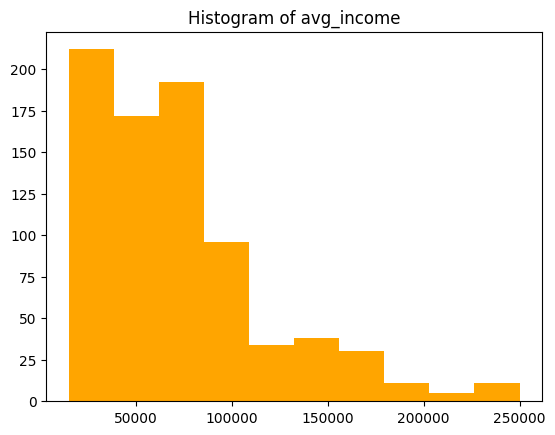

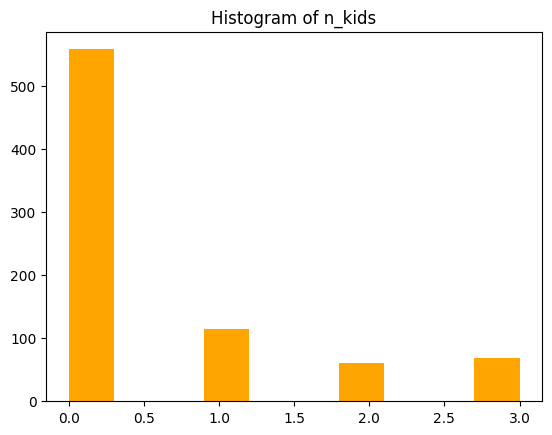

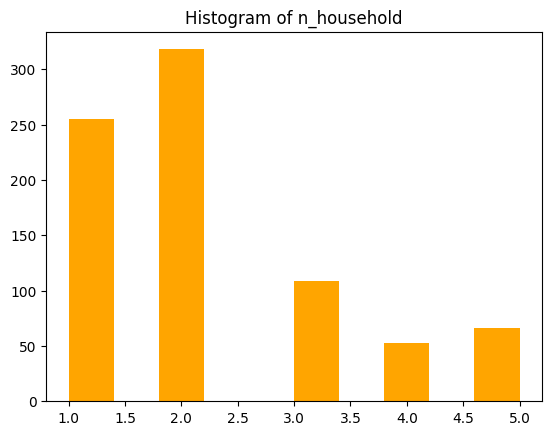

In [60]:
graphs(customer_info.loc[:, customer_info.columns != 'household_key'], graph = 'histogram')